In [1]:
# Import Libraries
import numpy as np

from project_utils.bb_model import BB_Model
from project_utils.feature_stats import Feature_Statistics
from project_utils.feature_stats import Regression_Container

Num_Points = 1


In [2]:
# Load Boston model

Boston_Data = BB_Model('Boston')

#Boston_Data.df().head()

In [3]:
Boston_Data.MPL()

C:\Users\deneb\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.5270263237579467


MLPRegressor(random_state=RandomState(MT19937) at 0x27D093D9840)

In [4]:
Boston_Data.Random_Forest()

0.9127029551042252


RandomForestRegressor(random_state=RandomState(MT19937) at 0x27D093D9840)

In [5]:
print(Boston_Data.get_features())

['crime_rate', 'zoned_lots', 'industry', 'by_river', 'NOX', 'avg_rooms', 'pre_1940', 'emp_distance', 'rad_access', 'tax_rate', 'pupil_tea_rat', 'low_status']


In [6]:
#Default settings
from unravel_2.ur_model import UR_Model

X_train, X_test, y_train, y_test = Boston_Data.get_TT_data()


#Initializing the explainer object
Unravel_Exp = UR_Model(bbox_model           = Boston_Data.get_Random_Forest(),
                       train_data           = X_train,
                       categorical_features = Boston_Data.get_catagorical(),
                       mode                 = Boston_Data.get_mode())       


STD:  [2.61270354e+00 2.47102776e+01 6.80521504e+00 2.76037079e-01
 1.17057221e-01 6.74763270e-01 2.78491148e+01 2.06804365e+00
 7.70832553e+00 1.53519674e+02 2.21120832e+00 6.21316414e+00]


In [7]:
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)
print('Mean 0:', mean)
print('Std 0: ', std)


Mean 0: [1.48630645e+00 1.33448753e+01 1.03917452e+01 8.31024931e-02
 5.43004986e-01 6.34466205e+00 6.59778393e+01 4.03258504e+00
 8.00000000e+00 3.78905817e+02 1.81980609e+01 1.14789751e+01]
Std 0:  [2.61270354e+00 2.47102776e+01 6.80521504e+00 2.76037079e-01
 1.17057221e-01 6.74763270e-01 2.78491148e+01 2.06804365e+00
 7.70832553e+00 1.53519674e+02 2.21120832e+00 6.21316414e+00]


In [8]:
for i in range(5):
    print(X_test[i,:])

[  4.0974   0.      19.58     0.       0.871    5.468  100.       1.4118
   5.     403.      14.7     26.42  ]
[  0.35114   0.        7.38      0.        0.493     6.041    49.9
   4.7211    5.      287.       19.6       7.7    ]
[3.6150e-02 8.0000e+01 4.9500e+00 0.0000e+00 4.1100e-01 6.6300e+00
 2.3400e+01 5.1167e+00 4.0000e+00 2.4500e+02 1.9200e+01 4.7000e+00]
[5.82401e+00 0.00000e+00 1.81000e+01 0.00000e+00 5.32000e-01 6.24200e+00
 6.47000e+01 3.42420e+00 2.40000e+01 6.66000e+02 2.02000e+01 1.07400e+01]
[1.2650e-01 2.5000e+01 5.1300e+00 0.0000e+00 4.5300e-01 6.7620e+00
 4.3400e+01 7.9809e+00 8.0000e+00 2.8400e+02 1.9700e+01 9.5000e+00]


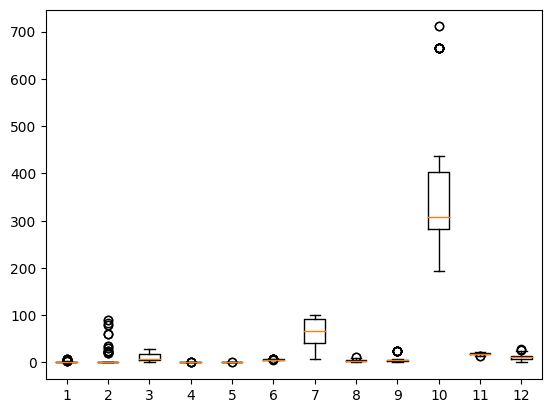

In [9]:
from matplotlib import pyplot
pyplot.boxplot(x=X_test)
pyplot.show()

In [10]:
# Generate explantion data for Random Forest

Boston_Stats = Feature_Statistics(feature_names = Boston_Data.get_features(), mode = Boston_Data.get_mode())

if Num_Points == 0: Num_Points = X_test.shape[0]

for test_instance in range(Num_Points):

    print('INSTANCE: ', test_instance)
       
    data_row  = np.array([X_test[test_instance]])
    
    Unravel_Exp.explain(X_init            = data_row,
                        feature_names     = Boston_Data.get_features(),
                        alpha             = "FUR_W",
                        max_iter          = 20,
                        normalize         = False,
                        importance_method = "ARD")
       
    f_predict = Boston_Data.get_Random_Forest().predict(data_row.reshape(1, -1))

    e_predict = Unravel_Exp.exp_predict(data_row)
    
    e_predict = np.array(e_predict).ravel()
    
    print(f_predict, e_predict)
    

    Boston_Stats.Add_Sample(sample       = data_row,
                            outcome      = y_test[test_instance],
                            f_prediction = f_predict,
                            e_prediction = e_predict)
    

INSTANCE:  0
2  :  [[  4.0974   0.      19.58     0.       0.871    5.468  100.       1.4118
    5.     403.      14.7     26.42  ]]  :  [13.835]  :  [1.00000004e-05]  :  [-126.02433122]
2  :  [[ 4.44215168e+00 -1.50056312e+01  1.93166721e+01 -5.05743942e-02
   8.39716441e-01  5.06823601e+00  9.62859048e+01  1.10253995e+00
   8.68107554e+00  2.36093720e+02  1.31133070e+01  2.26438459e+01]]  :  [0.]  :  [1.]  :  [-81.35109757]
2  :  [[ 4.49372133e+00 -3.54996555e+01  1.75204345e+01  2.16435679e-04
   8.55745280e-01  6.43876543e+00  4.41869367e+01 -2.29349522e-01
   1.00088653e+00  3.36179936e+02  1.69487678e+01  3.59570865e+01]]  :  [0.]  :  [1.]  :  [-26.48021669]
2  :  [[  4.51126107  13.49997103  24.54329934   0.77469956   0.86645848
    5.69006981  86.24718207   5.1695727   17.19163156 727.94897212
   14.2561201   42.64095294]]  :  [0.]  :  [1.]  :  [-306.73231802]
2  :  [[ 1.16137102e+00 -2.43922110e+01  2.16125555e+01  5.48969865e-02
   7.08826934e-01  4.77561366e+00  1.00330330e+

In [11]:
debug_data = Unravel_Exp.get_debug_data()

In [12]:
x_diffs = debug_data[:,:,0]
mean_ps = debug_data[:,:,1]
std_ps  = debug_data[:,:,2]
f_acqs  = debug_data[:,:,3]

In [13]:
#print(f_acqs)

In [14]:
#print(mean_ps)

In [15]:
import matplotlib.pyplot as plt


In [16]:
print(f_predict)
print(e_predict)


[13.835]
[1.38350000e+01 1.00000004e-05]


<function matplotlib.pyplot.show(close=None, block=None)>

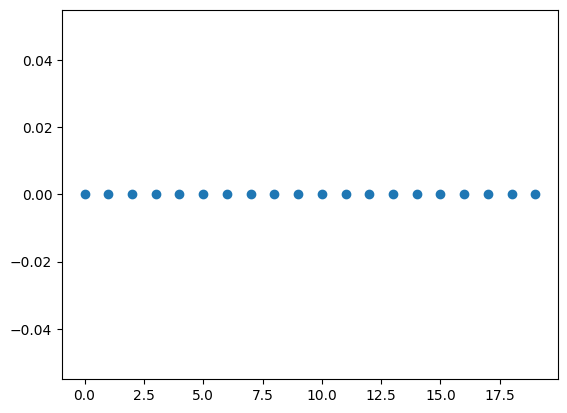

In [17]:
xmins = np.min(x_diffs, axis = 1)

plt.scatter(x=range(20), y=xmins)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

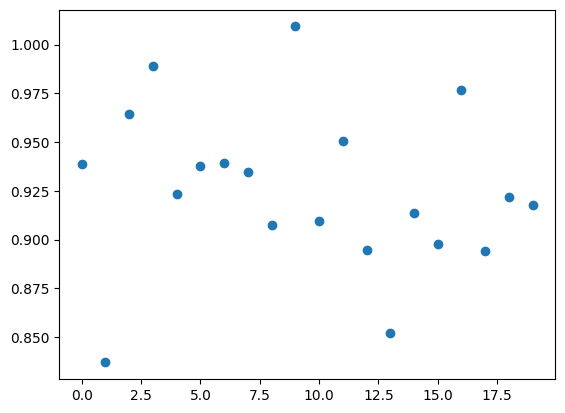

In [18]:
xmeans = np.mean(x_diffs, axis = 1)

plt.scatter(x=range(20), y=xmeans)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

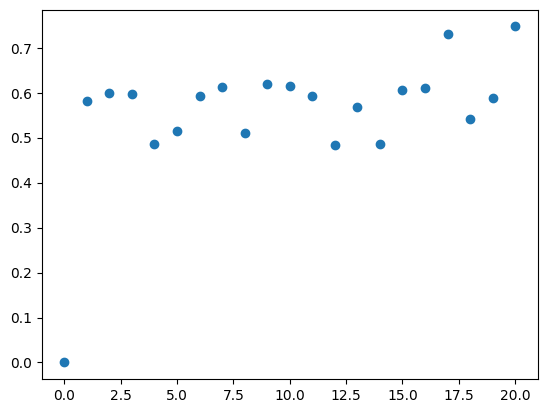

In [19]:
xmins = np.min(x_diffs, axis = 0)

plt.scatter(x=range(21), y=xmins)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

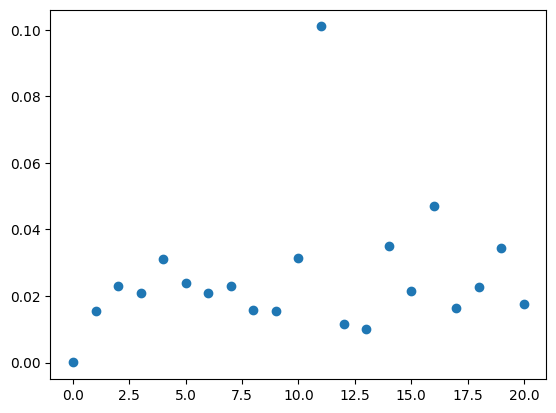

In [20]:
std_min = np.min(std_ps, axis = 0)

plt.scatter(x=range(21), y=std_min)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

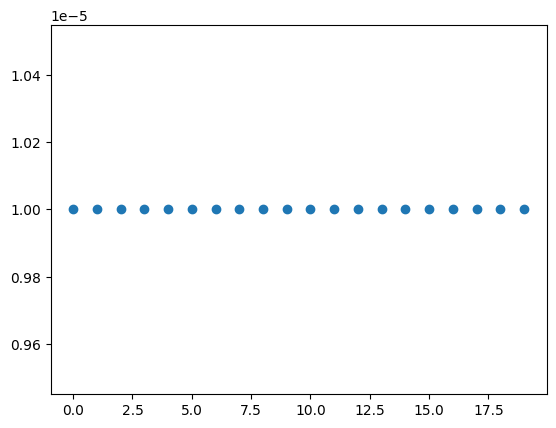

In [21]:
std_min = np.min(std_ps, axis = 1)

plt.scatter(x=range(20), y=std_min)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

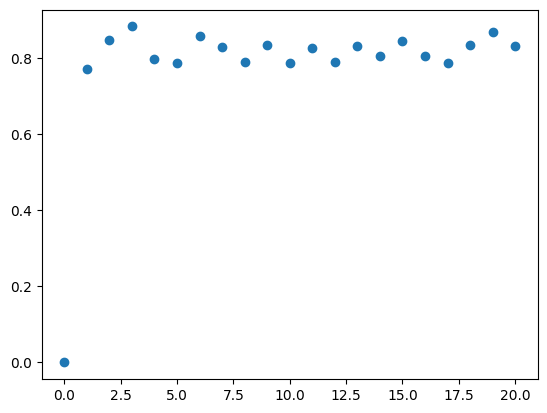

In [22]:
std_mean = np.mean(std_ps, axis = 0)

plt.scatter(x=range(21), y=std_mean)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

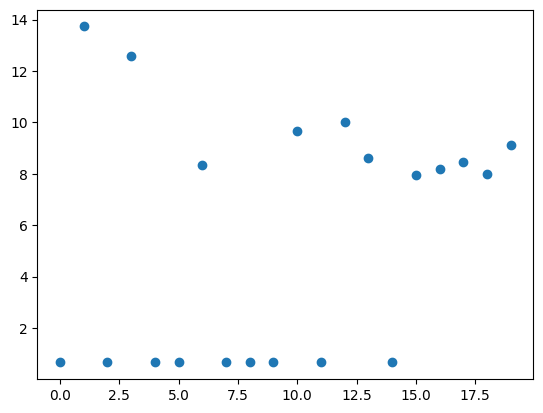

In [23]:
mean = np.mean(mean_ps, axis = 1)

plt.scatter(x=range(20), y=mean)
plt.show

In [25]:

Boston_Stats.Feature_Counts(max_features=8, scaled=True, threshold=0.075)

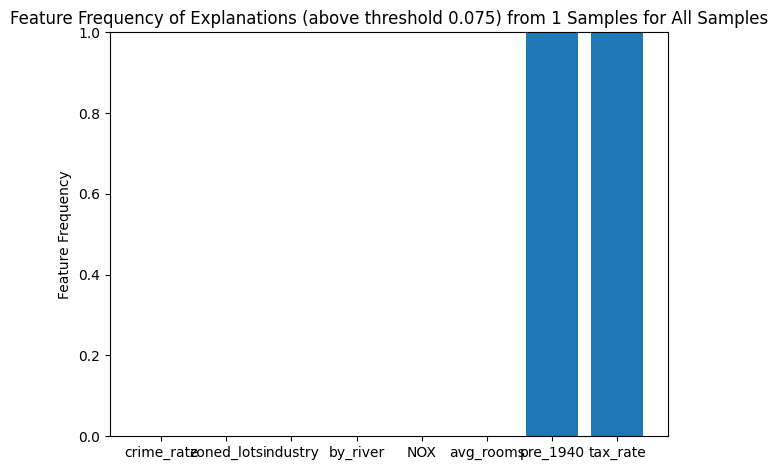

In [26]:
Boston_Stats.Frequency_Plot()

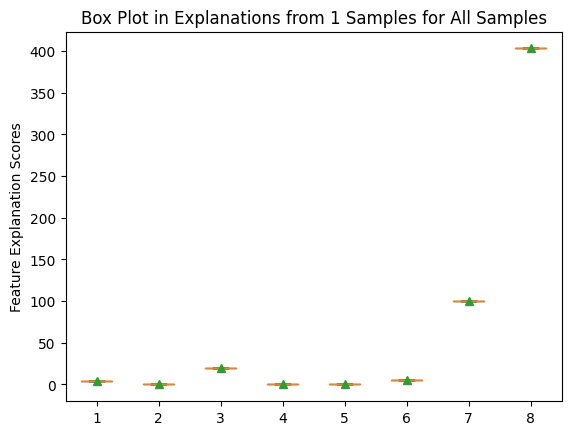

1 -      crime_rate
2 -      zoned_lots
3 -      industry
4 -      by_river
5 -      NOX
6 -      avg_rooms
7 -      pre_1940
8 -      tax_rate


In [27]:
Boston_Stats.Box_Plot()

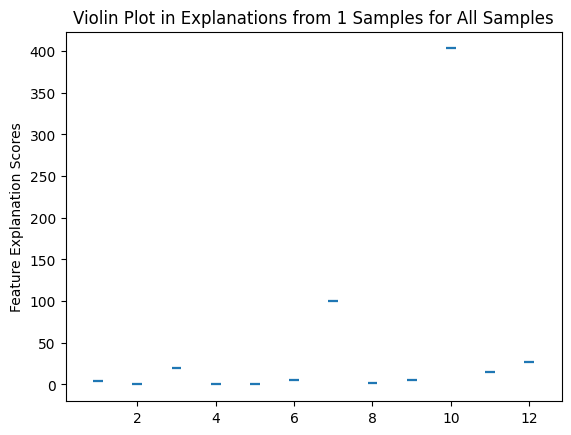

1 -      crime_rate
2 -      zoned_lots
3 -      industry
4 -      by_river
5 -      NOX
6 -      avg_rooms
7 -      pre_1940
8 -      emp_distance
9 -      rad_access
10 -     tax_rate
11 -     pupil_tea_rat
12 -     low_status


In [28]:
Boston_Stats.Violin_Plot(top_features=False)

In [29]:
Boston_Container = Regression_Container(Boston_Stats, 5)

Boston_Container.Feature_Counts(max_features=11, scaled=True, threshold=0.05)


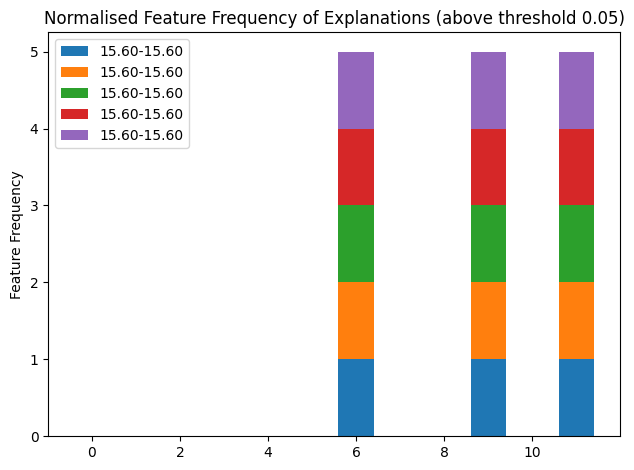

0 -      crime_rate
1 -      zoned_lots
2 -      industry
3 -      by_river
4 -      NOX
5 -      avg_rooms
6 -      pre_1940
7 -      emp_distance
8 -      rad_access
9 -     tax_rate
10 -     pupil_tea_rat
11 -     low_status


In [30]:
Boston_Container.Frequency_Plot()

In [31]:
Boston_Stats.Fidelity()

Average, Var, and Max Differences:
y - BB(x):           1.7650000000000041  :  0.0  :  1.7650000000000041
y - exp(x):          1.7650000013745668  :  0.0  :  1.7650000013745668
BB(x) - exp(x):      1.3745626858963078e-09  :  0.0  :  1.3745626858963078e-09
Average exp(x) var:  1.0000000413701846e-05


In [32]:
Boston_Stats.Jaccard_Values()

C:\Users\deneb\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\deneb\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Mean Jaccard Similarity:  nan
Mean Jaccard Distance:    nan


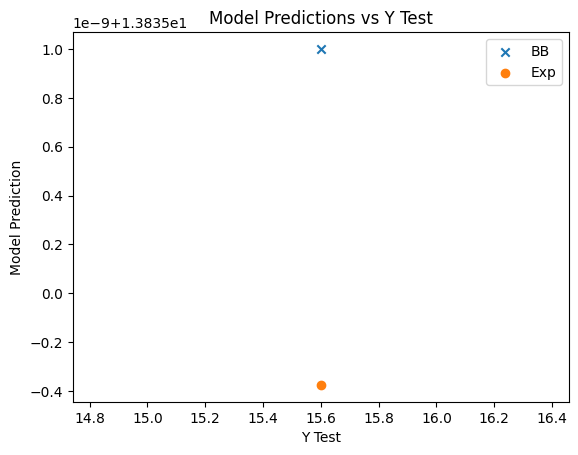

In [33]:
Boston_Stats.Reg_Fidelity_Graph()